# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [3]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
# Find the dimensions of the dataframe
df.shape

(1898, 9)

Observations:
Tha DataFrame has 1898 rows and 9 columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
There are three datatypes of the different columns in the given DataFrame: 
- float64("cost_of_the_order"), 
- int64("order_id", "customer_id", "food_preparation_time", "delivery_time"), 
- object("restaurant_name", "cuisine_type", "day_of_the_week", "rating")


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Find the number of missing values in each column
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no any missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
#calculate descriptive statistics for all numeric columns
pd.set_option('display.float_format', lambda x: '%.2f' % x) # round numbers in the table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


In [8]:
#calculate descriptive statistics for numeric columns except order_id and cutomer_id 
pd.set_option('display.float_format', lambda x: '%.2f' % x) # round numbers in the table
df[['cost_of_the_order', 'food_preparation_time', 'delivery_time']].describe().T

,count,mean,std,min,25%,50%,75%,max
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
Cost of the order ranges from 4.47 to 35.41 USD with average cost about 16.50 USD.

Delivery time ranges from 15 to 33 minutes with average time about 24.16 minutes.

The minimum time it takes for food to be prepared once an order is placed is 20 minutes.
The maximum time it takes for food to be prepared once an order is placed is 35 minutes.
The average time it takes for food to be prepared once an order is placed is about 27.37 minutes.

'Order_id' and 'customer_id' are excluded, as their statistic does not make any sence for analysis.

### **Question 5:** How many orders are not rated? [1 mark]

In [8]:
# Count the number of values for each feedback rating left by customers
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
There are 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

<b>Order ID<b>

In [9]:
# Count unique values of Order ID
print('The total number of orders is: ' , df['order_id'].nunique())

The total number of orders is:  1898


<b>Cutomer ID<b>

In [10]:
# Count unique values of Customer ID 
print('The total number of customers is: ' , df['customer_id'].nunique())

The total number of customers is:  1200


In [11]:
# Count number of orders for each Cutomer ID
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

Text(0, 0.5, 'Number of Customers')

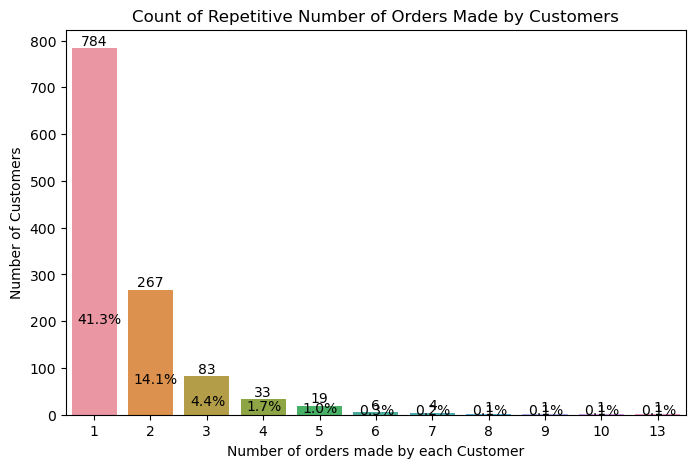

In [12]:
# Create a countplot
plt.figure(figsize = (8,5))
repetitive_plot = sns.countplot(df['customer_id'].value_counts())
for label in repetitive_plot.containers:
    repetitive_plot.bar_label(label) # add corresponding labels on the top of each bar

# Add percentage labels:     
for p in repetitive_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1898)
    x = p.get_x() + p.get_width() - 0.7
    y = p.get_y() + p.get_height()/4
    repetitive_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels
plt.title('Count of Repetitive Number of Orders Made by Customers')
plt.xlabel('Number of orders made by each Customer')
plt.ylabel('Number of Customers')

<b>Observations:<b>

The maximum number of orders one customer made is 13. The vast majority of customers (784), which is 41.3 percent, made only one order.

<b>Restaurant Name<b>

In [13]:
# Restaurant name unique values
print('The total number of restaurants is: ' , df['restaurant_name'].nunique())

The total number of restaurants is:  178


Text(0, 0.5, 'Number of Orders Placed')

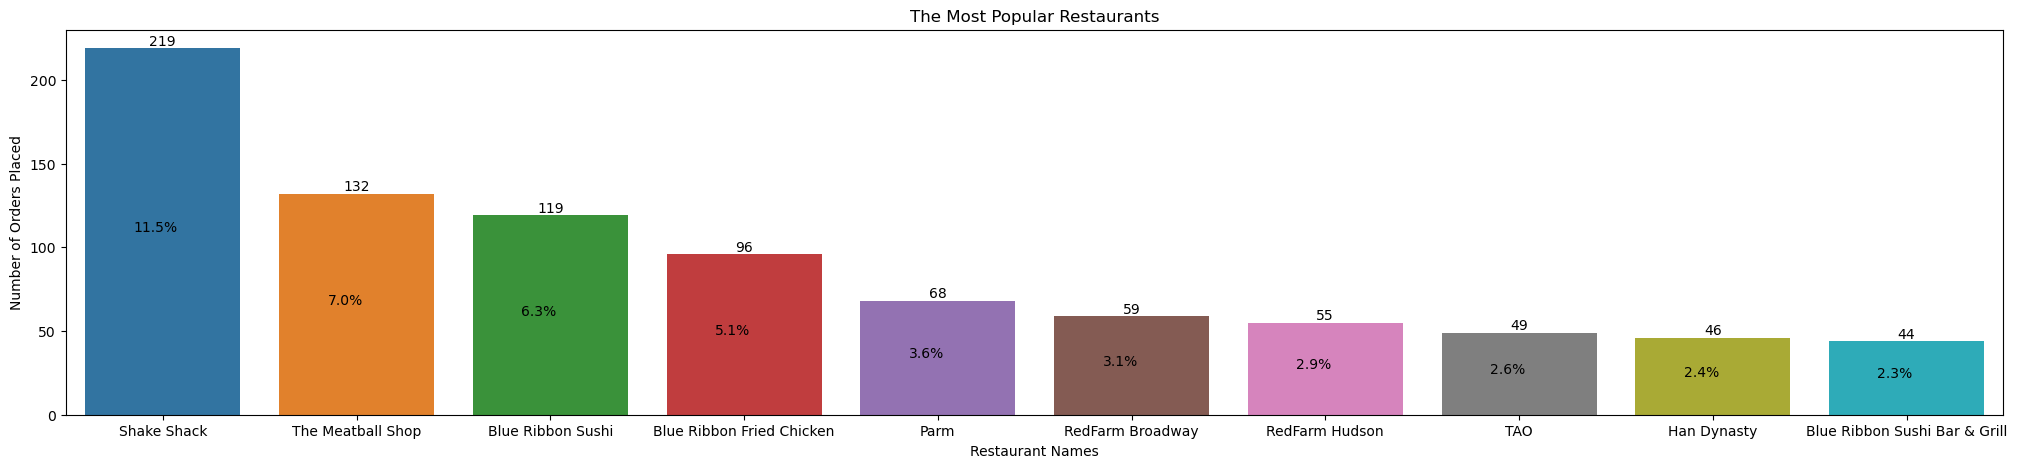

In [14]:
# Count plot for 10 the most popular restaurants
plt.figure(figsize = (25,5))
restaurant_plot = sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:10].index)
for label in restaurant_plot.containers:
    restaurant_plot.bar_label(label) # add corresponding labels on the top of each bar

# Add percentage labels:     
for p in restaurant_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1898)
    x = p.get_x() + p.get_width() - 0.55
    y = p.get_y() + p.get_height()/2
    restaurant_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels  
plt.title('The Most Popular Restaurants')
plt.xlabel('Restaurant Names')
plt.ylabel('Number of Orders Placed')

<b>Observations:<b>

The most popular restaurant is "Shake Shack" with 219 orders placed, which is 11.5 percents of the total nmber of orders.

<b>Cuisine Type<b>

In [15]:
# Cuisine unique values
print('The number of variety of cuisine types is: ' , df['cuisine_type'].nunique())

The number of variety of cuisine types is:  14


Text(0, 0.5, 'Count')

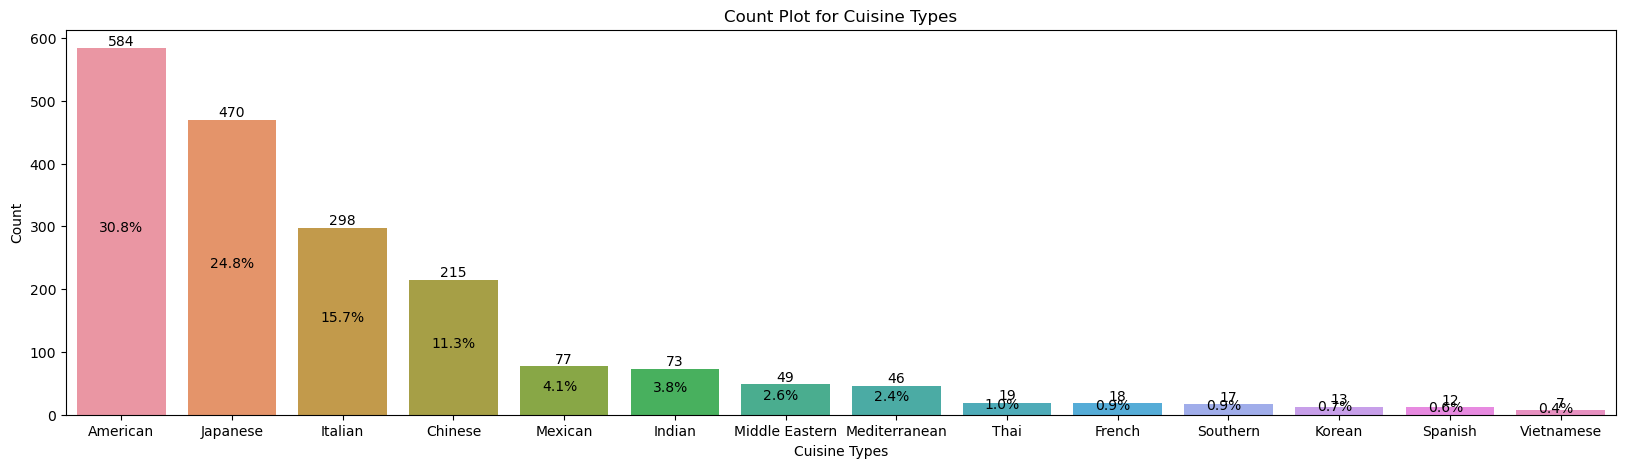

In [16]:
# Cuisine Count Plot
plt.figure(figsize = (20,5))
cuisine_plot = sns.countplot(data = df, x = 'cuisine_type', order=df['cuisine_type'].value_counts().index)
for label in cuisine_plot.containers:
    cuisine_plot.bar_label(label) # add corresponding labels on the top of each bar

# Add percentage labels: 
for p in cuisine_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1898)
    x = p.get_x() + p.get_width() - 0.6
    y = p.get_y() + p.get_height()/2
    cuisine_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels     
plt.title('Count Plot for Cuisine Types')
plt.xlabel('Cuisine Types')
plt.ylabel('Count')

<b>Observations:<b>

The most popular cuisine is American with 584 orders placed, which is 30.8 percents of the total number of orders.
It is followed by Japanese (470 orders) and Italian (298 orders).
The least popular cuisine is Vietnamese with 7 orders placed.

<b>Cost of the Order<b>

In [17]:
# Cost of Order Minimum, maximum, mean, and median values
print('The minimum cost of orders is: $', df['cost_of_the_order'].min())
print('The maximum cost of orders is: $', df['cost_of_the_order'].max())
print('The average cost of orders is: $', round(df['cost_of_the_order'].mean(), 2))
print('The median cost of orders is: $', df['cost_of_the_order'].median())

The minimum cost of orders is: $ 4.47
The maximum cost of orders is: $ 35.41
The average cost of orders is: $ 16.5
The median cost of orders is: $ 14.14


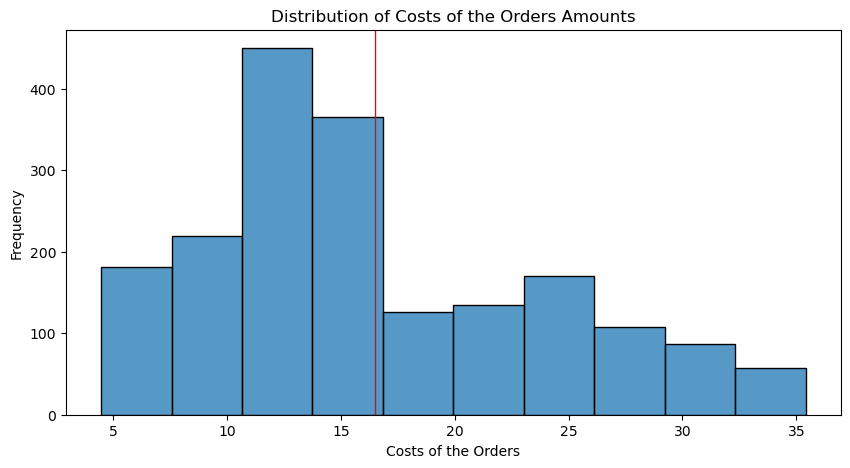

In [18]:
# Cost of Order Histogram
plt.figure(figsize = (10,5))
sns.histplot(df['cost_of_the_order'], bins = 10)
plt.axvline(df['cost_of_the_order'].mean(), color='r', linewidth=1) # add red vertical line for mean

# Add the graph title and axes labels
plt.title('Distribution of Costs of the Orders Amounts')
plt.xlabel('Costs of the Orders')
plt.ylabel('Frequency')

# Display the plot
plt.show()

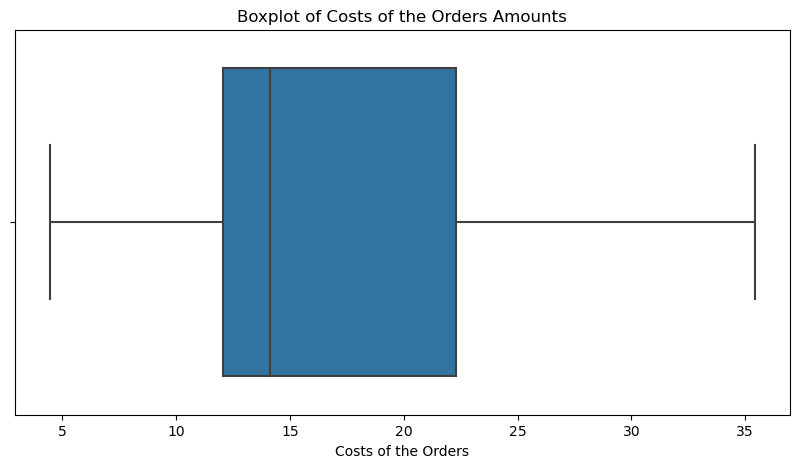

In [19]:
# Cost of Order Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(df['cost_of_the_order'])

# Add the graph title and axes labels
plt.title('Boxplot of Costs of the Orders Amounts')
plt.xlabel('Costs of the Orders')

# display the plot
plt.show()

<b>Observations:<b>

Based on the histogram and box plot, 'cost_of_the_order' is right-skewed.

The histogram demonstrates a long right tail and the mean is also to the right of the peak of the histogram.
The box plot has a longer right whisker, compared to the left one.
The average order cost is about 16 USD (the red vertical line on the hstogram). 
The majority of the costs of the orders ranges from 11 USD to 23 USD.

<b>Day of the Week<b>

In [20]:
# Day of the week unique values
print('The number of variety of day of the week values is: ' , df['day_of_the_week'].nunique())

The number of variety of day of the week values is:  2


Text(0, 0.5, 'Count')

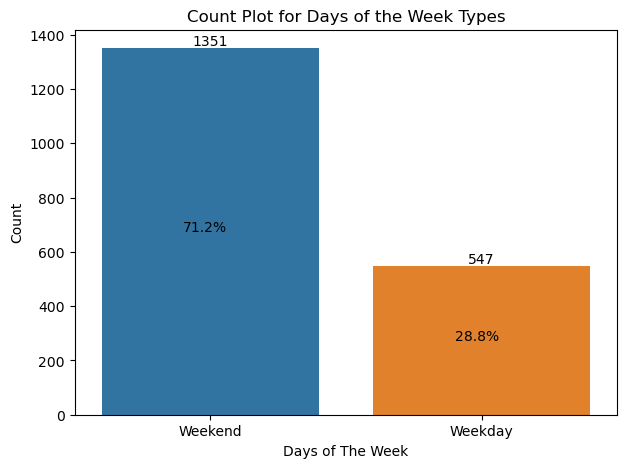

In [21]:
# Day of the week Count plot
plt.figure(figsize = (7,5))
day_plot = sns.countplot(data = df, x = 'day_of_the_week')
for label in day_plot.containers:
    day_plot.bar_label(label) # add corresponding labels on the top of each bar

# Add percentage labels
for p in day_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1898)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()/2
    day_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels    
plt.title('Count Plot for Days of the Week Types')
plt.xlabel('Days of The Week')
plt.ylabel('Count')

In [22]:
df['day_of_the_week'].value_counts('Weekend')

Weekend   0.71
Weekday   0.29
Name: day_of_the_week, dtype: float64

<b>Observations:<b>

Based on the count plot, the majority of orders were placed on Weekends - 1351 orders, which is 71.2 percent of the total number of orders.
Weekday orders count for 28.8 percent of the total number of orders.

<b>Rating<b>

In [23]:
# Rating unique values
print('The variety of rating values is the following: ' , df['rating'].unique())

The variety of rating values is the following:  ['Not given' '5' '3' '4']


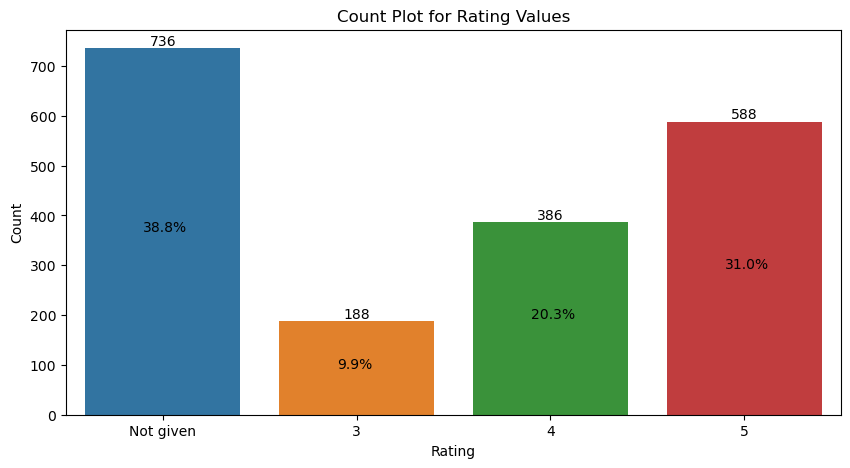

In [24]:
# Rating count plot
plt.figure(figsize = (10,5))
rating_plot = sns.countplot(data = df, x = 'rating', order=['Not given', "3", "4", "5"])

for label in rating_plot.containers:
    rating_plot.bar_label(label) # add corresponding labels on the top of each bar

# Add percentage labels     
for p in rating_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1898)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()/2
    rating_plot.annotate(percentage, (x, y))    

# Add the graph title and axes labels
plt.title('Count Plot for Rating Values')
plt.xlabel('Rating')
plt.ylabel('Count')

# Display the plot
plt.show()

<b>Observations:<b>

Based on the count plot, about one third of all orders have no rating provided.
Out of ratings from 3 to 5, there is a prevalence of rating value "5".

<b>Food Preparation time<b>

In [25]:
# Food Preparation Time minimum, maximum, mean, and median values
print('The minimum food preparation time is: ', df['food_preparation_time'].min(), 'minutes')
print('The maximum food preparation time is: ', df['food_preparation_time'].max(), 'minutes')
print('The average food preparation time is: ', round(df['food_preparation_time'].mean(), 2), 'minutes')
print('The median food preparation time is: ', df['food_preparation_time'].median(), 'minutes')

The minimum food preparation time is:  20 minutes
The maximum food preparation time is:  35 minutes
The average food preparation time is:  27.37 minutes
The median food preparation time is:  27.0 minutes


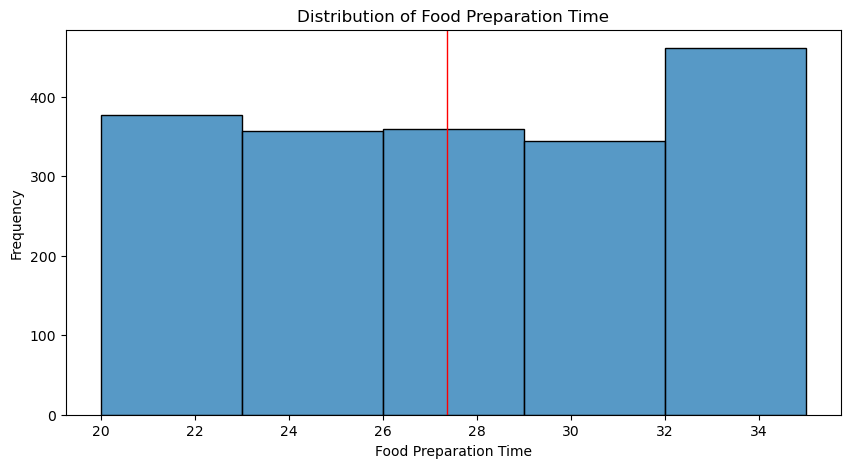

In [26]:
# Food Preparation Time Histogram
plt.figure(figsize = (10,5))
sns.histplot(df['food_preparation_time'], bins = 5)
plt.axvline(df['food_preparation_time'].mean(), color='r', linewidth=1) # add red vertical line for mean

# Add the graph title and axes labels
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Frequency')

# Display the plot
plt.show()

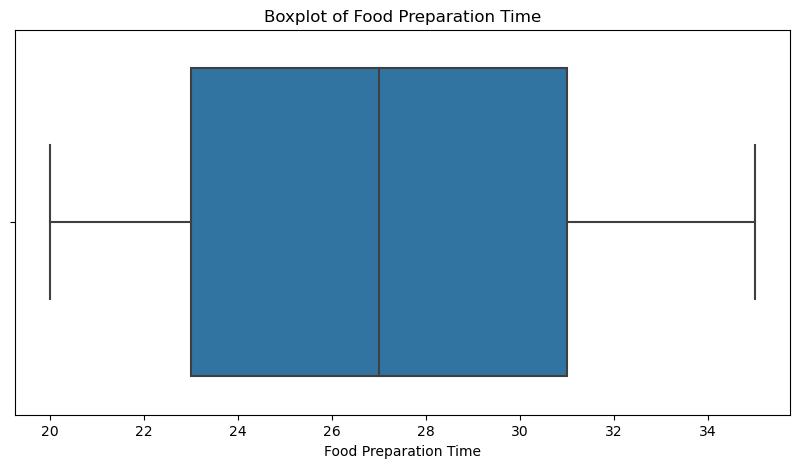

In [27]:
# Food Preparation Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(df['food_preparation_time'])

# Add the graph title and axes labels
plt.title('Boxplot of Food Preparation Time')
plt.xlabel('Food Preparation Time')

# Display the plot
plt.show()

<b>Observations:<b>

Based on the histogarm and box plot, frequency of orders is approximately equally distributed by food preparation time. The highest frequency belongs to the longest preparation time.
- The minimum food preparation time is:  20 minutes
- The maximum food preparation time is:  35 minutes
- The average food preparation time is:  27.37 minutes
- The median food preparation time is:  27.0 minutes

<b>Delivery time<b>

In [28]:
# Delivery Time minimum, maximum, mean, and median values
print('The minimum delivery time is: ', df['delivery_time'].min(), 'minutes')
print('The maximum delivery time is: ', df['delivery_time'].max(), 'minutes')
print('The average delivery time is: ', round(df['delivery_time'].mean(), 2), 'minutes')
print('The median delivery time is: ', df['delivery_time'].median(), 'minutes')

The minimum delivery time is:  15 minutes
The maximum delivery time is:  33 minutes
The average delivery time is:  24.16 minutes
The median delivery time is:  25.0 minutes


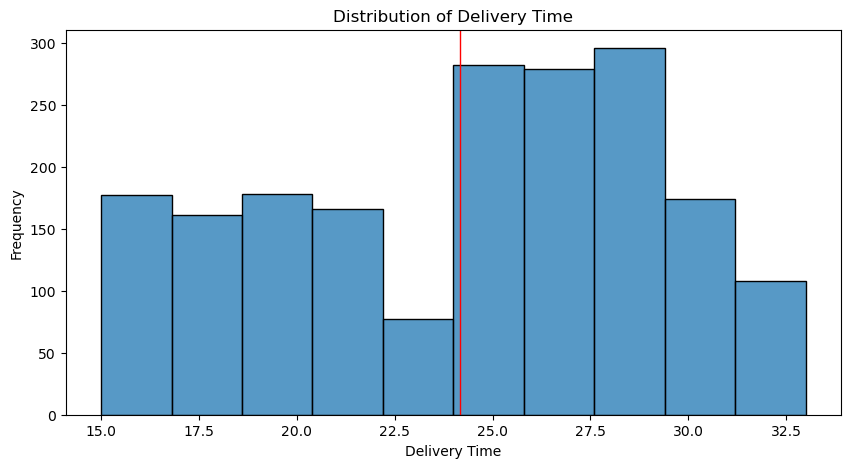

In [29]:
# Delivery Time Histogram
plt.figure(figsize = (10,5))
sns.histplot(df['delivery_time'], bins = 10)
plt.axvline(df['delivery_time'].mean(), color='r', linewidth=1) # add red vertical line for mean

# Add the graph title and axes labels
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')

# Display the plot
plt.show()

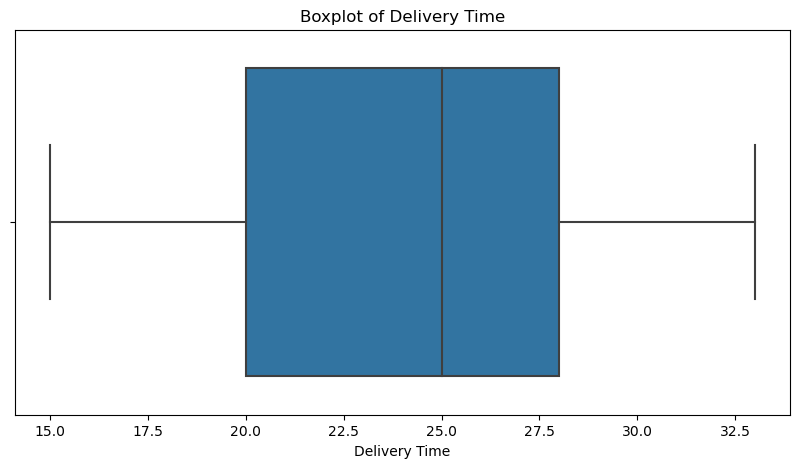

In [30]:
# Delivery Time Boxplot
plt.figure(figsize = (10,5))
sns.boxplot(df['delivery_time'])

# Add the graph title and axes labels
plt.title('Boxplot of Delivery Time')
plt.xlabel('Delivery Time')

# Display the plot
plt.show()

<b>Observations:<b>

Based on the histogarm and box plot, oder delivery time is a little bit skewed to the left.
- The minimum order delivery time is:  15 minutes
- The maximum order delivery time is:  33 minutes
- The average order delivery time is:  24.16 minutes
- The median order delivery time is:  25.0 minutes

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [31]:
# Top five restaurants with the biggest number of orders received (in descending order)
df['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

Text(0, 0.5, 'Number of Orders Placed')

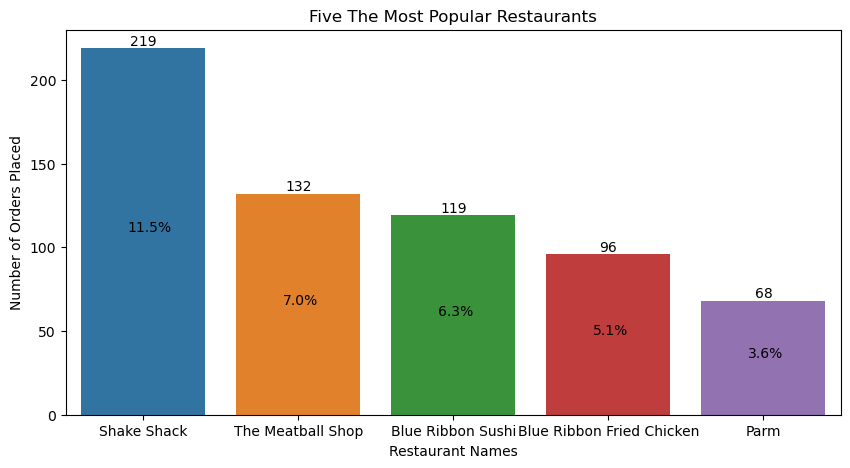

In [32]:
# Count plot for 5 the most popular restaurants
plt.figure(figsize = (10,5))
restaurant_plot = sns.countplot(data = df, x = 'restaurant_name', order = df.restaurant_name.value_counts().iloc[:5].index)
for label in restaurant_plot.containers:
    restaurant_plot.bar_label(label)
# Plot percentage labels:     
for p in restaurant_plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1898)
    x = p.get_x() + p.get_width() - 0.5
    y = p.get_y() + p.get_height()/2
    restaurant_plot.annotate(percentage, (x, y))
# Add the graph title and axes labels    
plt.title('Five The Most Popular Restaurants')
plt.xlabel('Restaurant Names')
plt.ylabel('Number of Orders Placed')

#### Observations:

The most popular restaurant is "Shake Shack" with 219 orders placed, which is 11.5 percent of the total number of orders.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [33]:
# Count number of orders placed for each cuisine type on the weekends (in descending order)
df_weekends = df[df['day_of_the_week'] == 'Weekend']
df_weekends['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

Text(0, 0.5, 'Count')

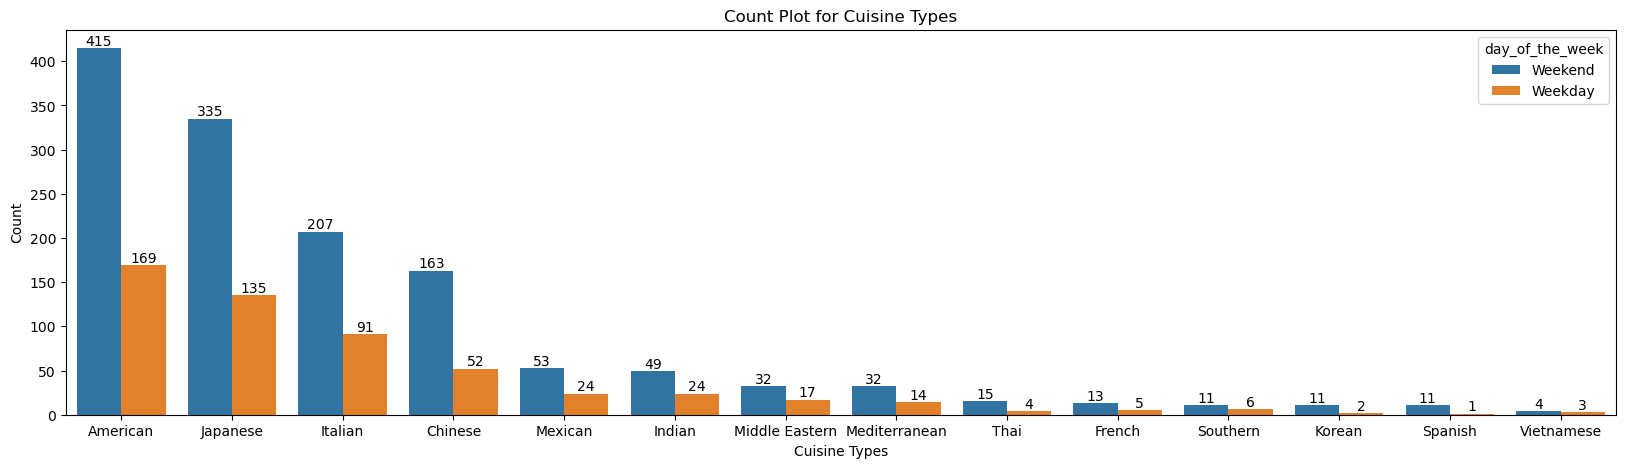

In [34]:
# Cuisine Count Plot split by day of the week
plt.figure(figsize = (20,5))
cuisine_plot = sns.countplot(data = df, x = 'cuisine_type', hue = 'day_of_the_week', order=df['cuisine_type'].value_counts().index)
for label in cuisine_plot.containers:
    cuisine_plot.bar_label(label) # add corresponding labels on the top of each bar
# Add the graph title and axes labels
plt.title('Count Plot for Cuisine Types')
plt.xlabel('Cuisine Types')
plt.ylabel('Count')

#### Observations:
The most popular cuisine on weekends is the American - 415 orders were placed. 

The proportions of cuisine types are almost not affected by the day of the week on which oreders were placed.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [35]:
# For the cost of orders greater than 20 find percentage of such orders
df1 = df[df['cost_of_the_order']>20]
print('Observations: \nThe number of the orders which cost more than 20 dollars is: ', df1.shape[0]) # how many orders cost more than 20 dollars
print('The percenatge of the orders which cost more than 20 dollars is: ', round((df1.shape[0] / df.shape[0]) * 100, 2), '%') # percentage number for the orders

Observations: 
The number of the orders which cost more than 20 dollars is:  555
The percenatge of the orders which cost more than 20 dollars is:  29.24 %


### **Question 10**: What is the mean order delivery time? [1 mark]

In [36]:
# Find delivery time mean
del_time_mean = df['delivery_time'].mean()
print('Observations: \nThe mean order delivery time is: ', round(del_time_mean, 2), 'minutes') # print the value rounded

Observations: 
The mean order delivery time is:  24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [37]:
# Top three most frequent customers
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The most frequent customers are:
- 52832 with 13 ordrs placed
- 47440 with 10 ordrs placed
- 83287 with 9 ordrs placed

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


<b>Rating vs Delivery time<b>

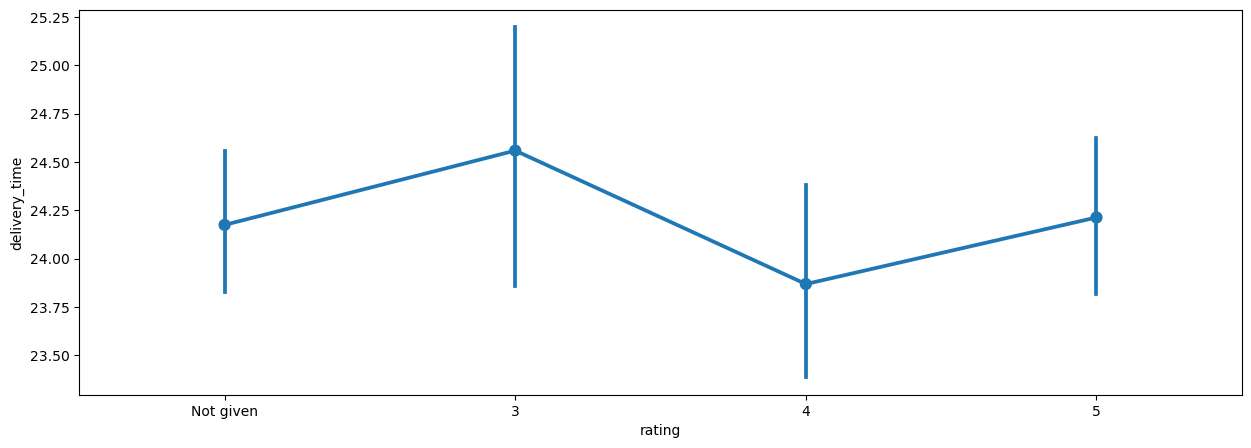

In [38]:
# Relationship between rating and delivery time
plt.figure(figsize = (15, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df, order=["Not given", "3", "4", "5"])
plt.show()

#### Observations:
No significnat dependcy is observed in this point plot.

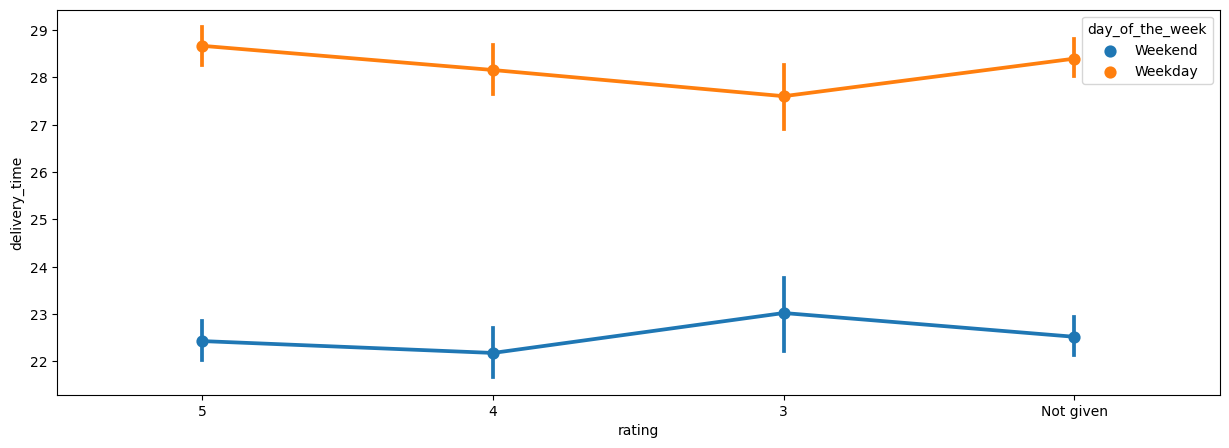

In [39]:
# Average number of delivery time across each rating for a given day of the week along with the confidence intervals
plt.figure(figsize = (15, 5))
sns.pointplot(x = 'rating', y = 'delivery_time', hue = 'day_of_the_week', data = df, order=["5", "4", "3", "Not given"])
plt.show()

<b>Observations:<b>

Rating and delivery time are proportinal (the longer delivery time has higher rating), so it would be intersting to analyze it further.

<b>Rating vs Food Preparation time<b>

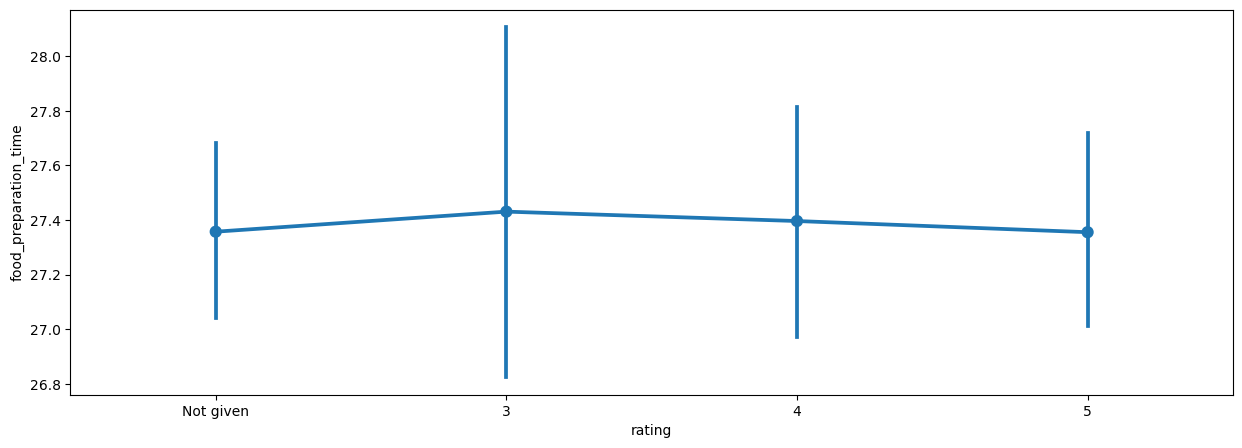

In [40]:
# Relationship between rating and food preparation time
plt.figure(figsize = (15, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df, order=["Not given", "3", "4", "5"])
plt.show()

<b>Observations:<b>

There is no significant dependency observed.

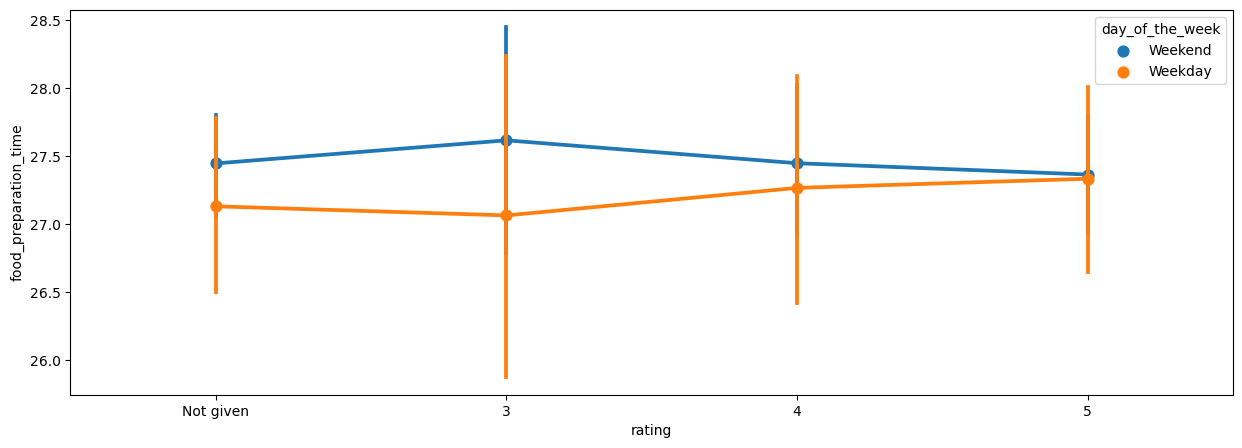

In [41]:
# Average number of food preparation time across each rating for a given day of the week along with the confidence intervals
plt.figure(figsize = (15, 5))
sns.pointplot(x = 'rating', y = 'food_preparation_time', hue = 'day_of_the_week', data = df, order=["Not given", "3", "4", "5"])
plt.show()

<b>Observations:<b>

There is no significant dependency observed.

<b>Rating vs Cost of the Order<b>

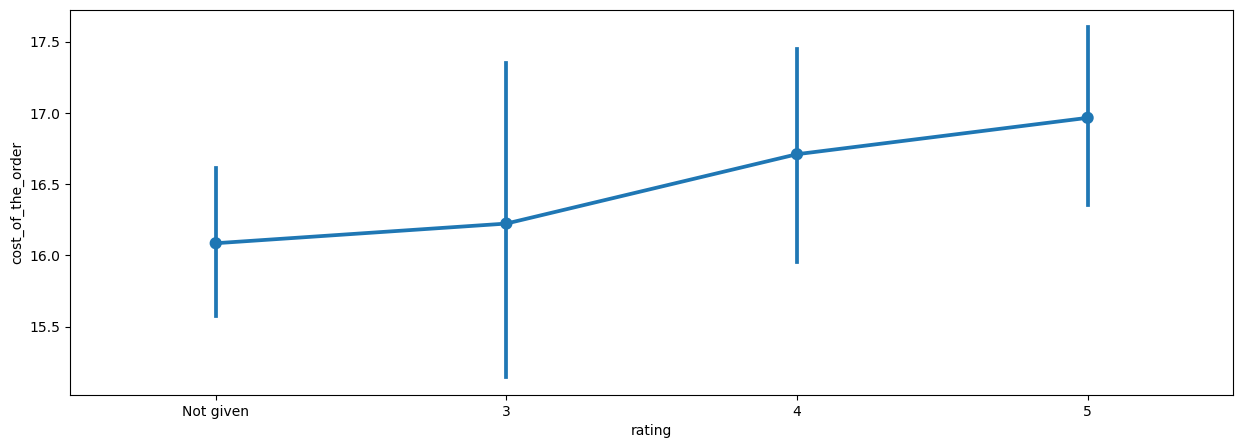

In [42]:
# Relationship between rating and cost of the order
plt.figure(figsize = (15, 5))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df, order=["Not given", "3", "4", "5"])
plt.show()

#### Observations:
More expensive orders have higher ratings. It would be interesting to analyze it further.

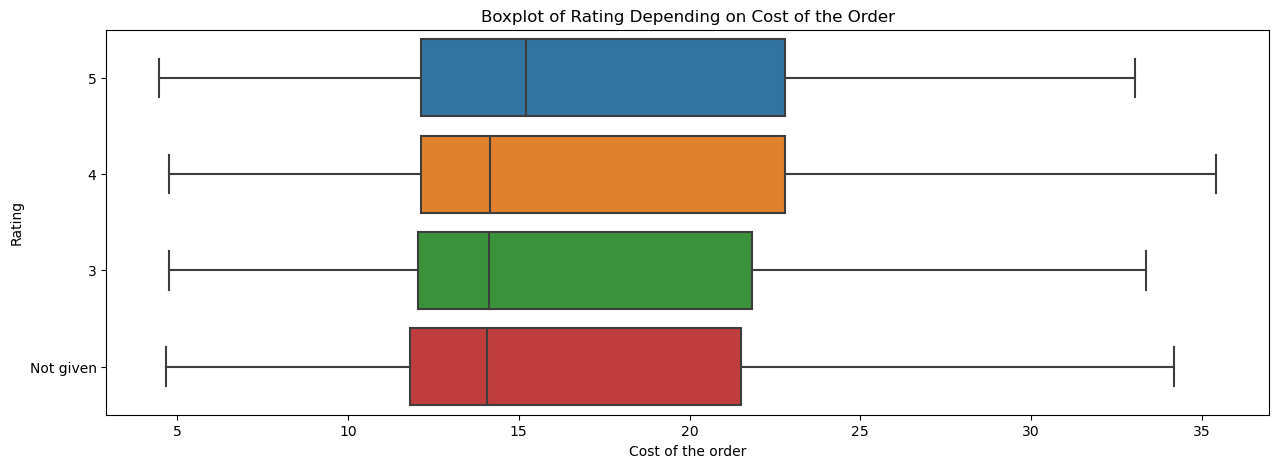

In [43]:
# Relationship between rating and cost of the order
plt.figure(figsize = (15,5))
sns.boxplot(x = df['cost_of_the_order'], y = df['rating'], order=["5", "4", "3", "Not given"])

# Add the graph title and axes labels
plt.title('Boxplot of Rating Depending on Cost of the Order')
plt.xlabel('Cost of the order')
plt.ylabel('Rating')

# Display the plot
plt.show()

#### Observations:
There is no significnat dependcy observed for ratings on the cost of the orders. Rating '5' has an insignificantly higher median cost of orders.

<b>Day of the Week vs Delivery Time<b>

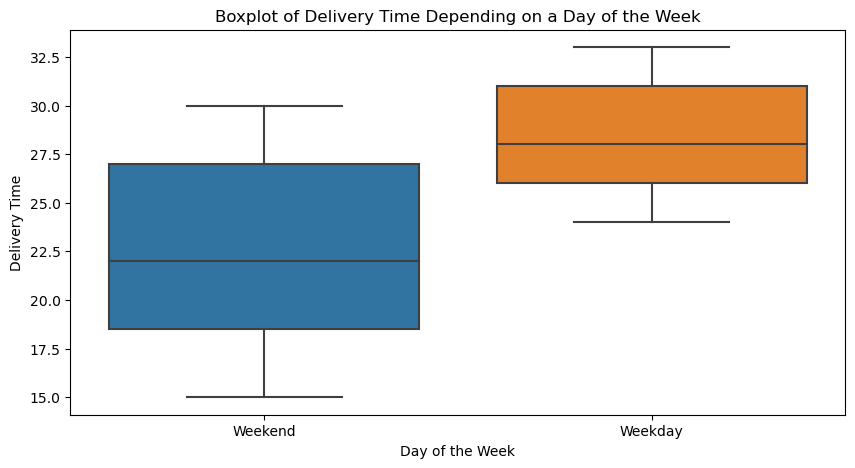

In [44]:
# Relationship between day of the week and delivery time
plt.figure(figsize = (10,5))
sns.boxplot(x = df['day_of_the_week'], y = df['delivery_time'])

# Add the graph title and axes labels
plt.title('Boxplot of Delivery Time Depending on a Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')

# Display the plot
plt.show()

In [45]:
# Find medians for delivery time on weekends and weekdays
df.groupby(['day_of_the_week'])['delivery_time'].median()

day_of_the_week
Weekday   28.00
Weekend   22.00
Name: delivery_time, dtype: float64

#### Observations:
The delivery times are higher during the weekdays and is more consistent than on the weekends.

- Weekday median delivery time is approximately 28 minutes
- Weekend median delivery time is approximately 22 minutes

<b>Cuisine Type vs Cost of the Order<b>

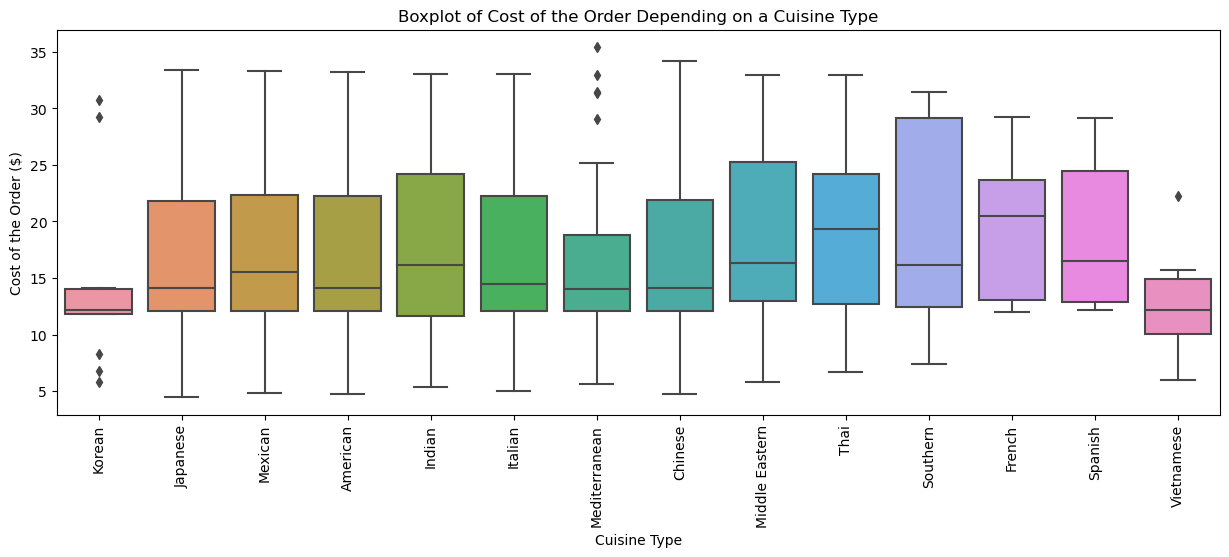

In [46]:
# Box plot for Cost of orders depending on a Cusine type
plt.figure(figsize=(15,5))
sns.boxplot(data = df, x = "cuisine_type", y = "cost_of_the_order")
plt.xticks(rotation = 90) # rotate x-axis labels

# Add the graph title and axes labels
plt.title('Boxplot of Cost of the Order Depending on a Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order ($)')
# Display the plot
plt.show()

#### Observations:
The biggest variation in cost of the order is observed for Southern cuisine.
While the lowest variation in cost of the order is observed for Korean cuisine.

<b>Cuisine Type vs Preparation Time<b>

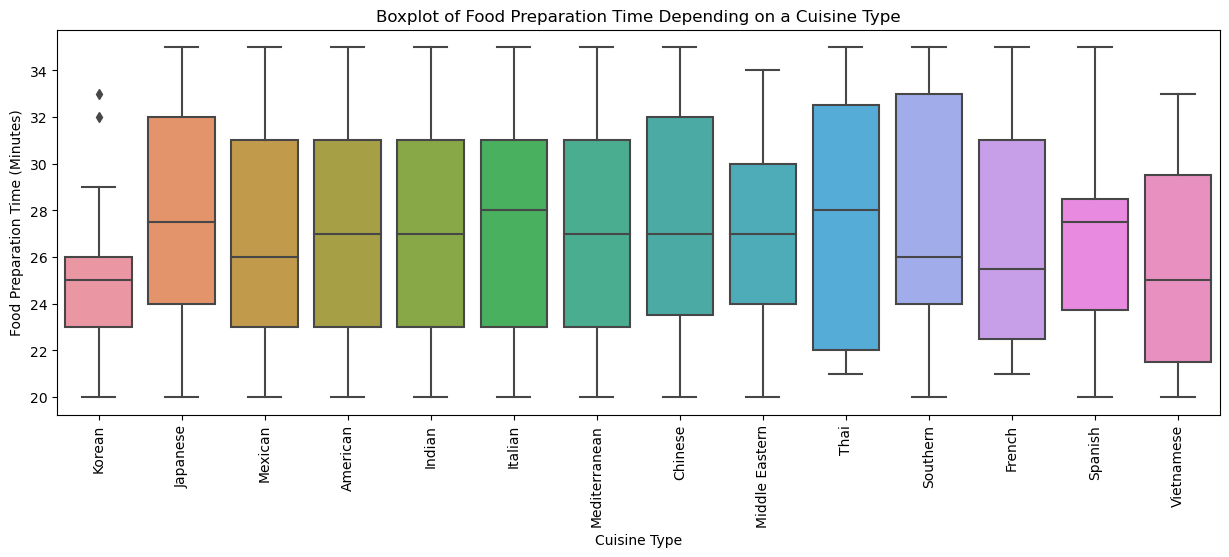

In [47]:
# Box plot for Food preparation time depending on a Cusine type
plt.figure(figsize = (15,5))
sns.boxplot(data = df, x = "cuisine_type", y = "food_preparation_time")
plt.xticks(rotation = 90) # rotate x-axis labels

# Add the graph title and axes labels
plt.title('Boxplot of Food Preparation Time Depending on a Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time (Minutes)')
# Display the plot
plt.show()

#### Observations:
The biggest variation in food preparation time is observed for Thai cuisine.
While the lowest variation in food preparation time is observed for Korean cuisine.

<b>Cost of the Order vs Day of the Week<b>

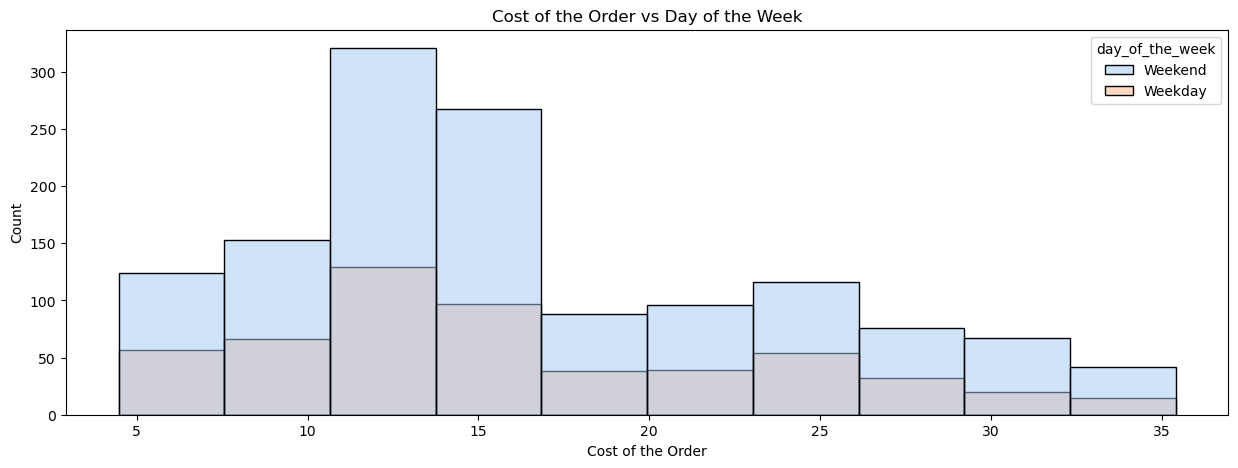

In [48]:
# Histograms for Cost of orders depending on a Day of the Week
plt.figure(figsize = (15,5))
sns.histplot(data = df, x = 'cost_of_the_order', hue = 'day_of_the_week', palette = "pastel", bins = 10)
# Add the graph title and axes labels
plt.title('Cost of the Order vs Day of the Week')
plt.xlabel('Cost of the Order')
plt.ylabel('Count')
# Display the plot
plt.show()

#### Observations:
The majority of the placed orders is in the range from 11 to 17 USD.

<b>Correlation<b>

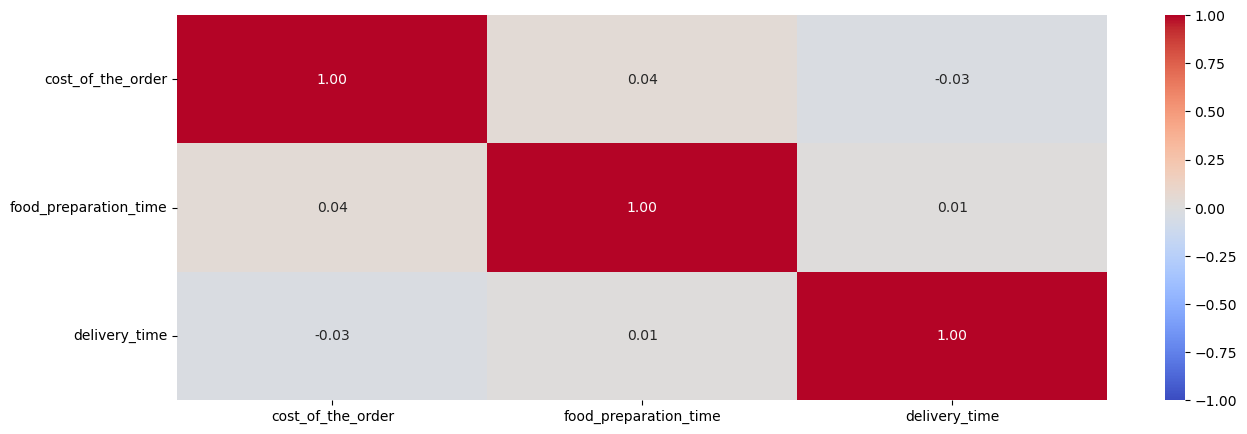

In [49]:
# The correlation heatmap 
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize = (15, 5))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm")
# Display the plot
plt.show()

<b>Observations:<b>

No significant results.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [50]:
# Filter the rated restaurants
df_rst_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rst_rated['rating'] = df_rst_rated['rating'].astype('int')  
df_rst_rated['rating_mean'] = df_rst_rated.groupby('restaurant_name')['rating'].mean()

# Create a dataframe that contains the restaurant names with their rating counts
df_rst_rated_count = df_rst_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rst_rated_count

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
...,...,...
151,Frank Restaurant,1
152,Socarrat Paella Bar,1
153,El Parador Cafe,1
154,Lucky Strike,1


In [51]:
# Get the series of restaurant names that have rating count more than 50
rest_names = df_rst_rated_count[df_rst_rated_count['rating']>50]['restaurant_name'] 

# Filter to get the dataframe of restaurants that have rating count more than 50
df_mean_4 = df_rst_rated[df_rst_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4.groupby(df_rst_rated['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna()


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:
Four restaurants satisfy the conditions in order to receive a promotional offer:
- The Meatball Shop
- Blue Ribbon Fried Chicken
- Shake Shack
- Blue Ribbon Sushi

All of them have rating count of more than 50 and the average rating is greater than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [52]:
# Define a function to determine the revenue based on the given conditions
def revenue(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
# Add a 'Revenue' column to the dataframe
df['Revenue'] = df['cost_of_the_order'].apply(revenue)
# Show top 10 rows
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,6.30
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21,0.91
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.90
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26,2.47
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26,1.08


In [53]:
# Compute the total revenue
total_rev = df['Revenue'].sum()
print('The total revenue is $', round(total_rev, 2))

The total revenue is $ 6166.3


#### Observations:
The total revenue FoodHub company gets from the restaurants is around 6,166 USD

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [54]:
# Create a column which accumulates total time
df['Total_Time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,Total_Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.74,49
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,5.58,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,1.83,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,6.30,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,1.83,54


In [55]:
# Define the numbers of orders and percentage under the given conditions
df_60 = df[df['Total_Time'] > 60] # creates a dataframe with rows in which Total time is greater than 60 minutes
print('The number of orders that take more than 60 minutes to deliver from the time the order is placed is:', df_60.shape[0], 'orders') # prints the number of such orders
percentage = round((df_60.shape[0] / df.shape[0]) * 100, 2) # computes percentage for such orders out of the total number of orders placed
print('The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is:',percentage, '%')


The number of orders that take more than 60 minutes to deliver from the time the order is placed is: 200 orders
The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is: 10.54 %


#### Observations:
The percentage of orders that take more than 60 minutes to get delivered from the time the order is placed is 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [56]:
# Obtain mean values for delivery times on various days of the weeks and print them
print('The mean delivery time on weekdays is: ',
     round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekends is: ',
     round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is:  28 minutes
The mean delivery time on weekends is:  22 minutes


#### Observations:
The delivery times are higher during the weekday than on the weekend.
- Weekday approximately 28 minutes
- Weekend approximately 22 minutes

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

1. There are 736 orders which are not rated. This is about 39% of the total number of orders.
This makes analysis of relationship of rating and another variables less productive and reliable.

2. The delivery time is lower on the weekends (with average time of 22.47 minutes. On the weekdays the average time is about 28.34 minutes.
3. The majority of orders were placed during the weekend (about 71%)
4. The most popular cuisine is the American cuisine. It stays popular for both weekends and weekdays.
5. The most popular restaurant is "Shake Shack" with 219 orders placed.
6. Whereas the maximum number of orders one customer made is 13, the majority of customers placed their order only once.

### Recommendations:

1. It is crucial to understand why the majority of customers placed only one order. May be they are just new customers. If not, then some proper feedback needs to be collected for future analysis.
2. Rating systems is not very informative in terms what is actually rated by customers.
3. The average delivery time is higher on weekdays. So, it would be good to analyze what reasons could be related to this issue.
4. Motivate customers to provide rating for restaurant services.

---